## Makemore

In [1]:
#imports

import torch
import matplotlib.pyplot as plt

import torch.nn.functional as F

import random

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
print(words[:10])
print(len(words))
print(min(len(w) for w in words))
print(max(len(w) for w in words))

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
32033
2
15


### Bigram

In [4]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [6]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

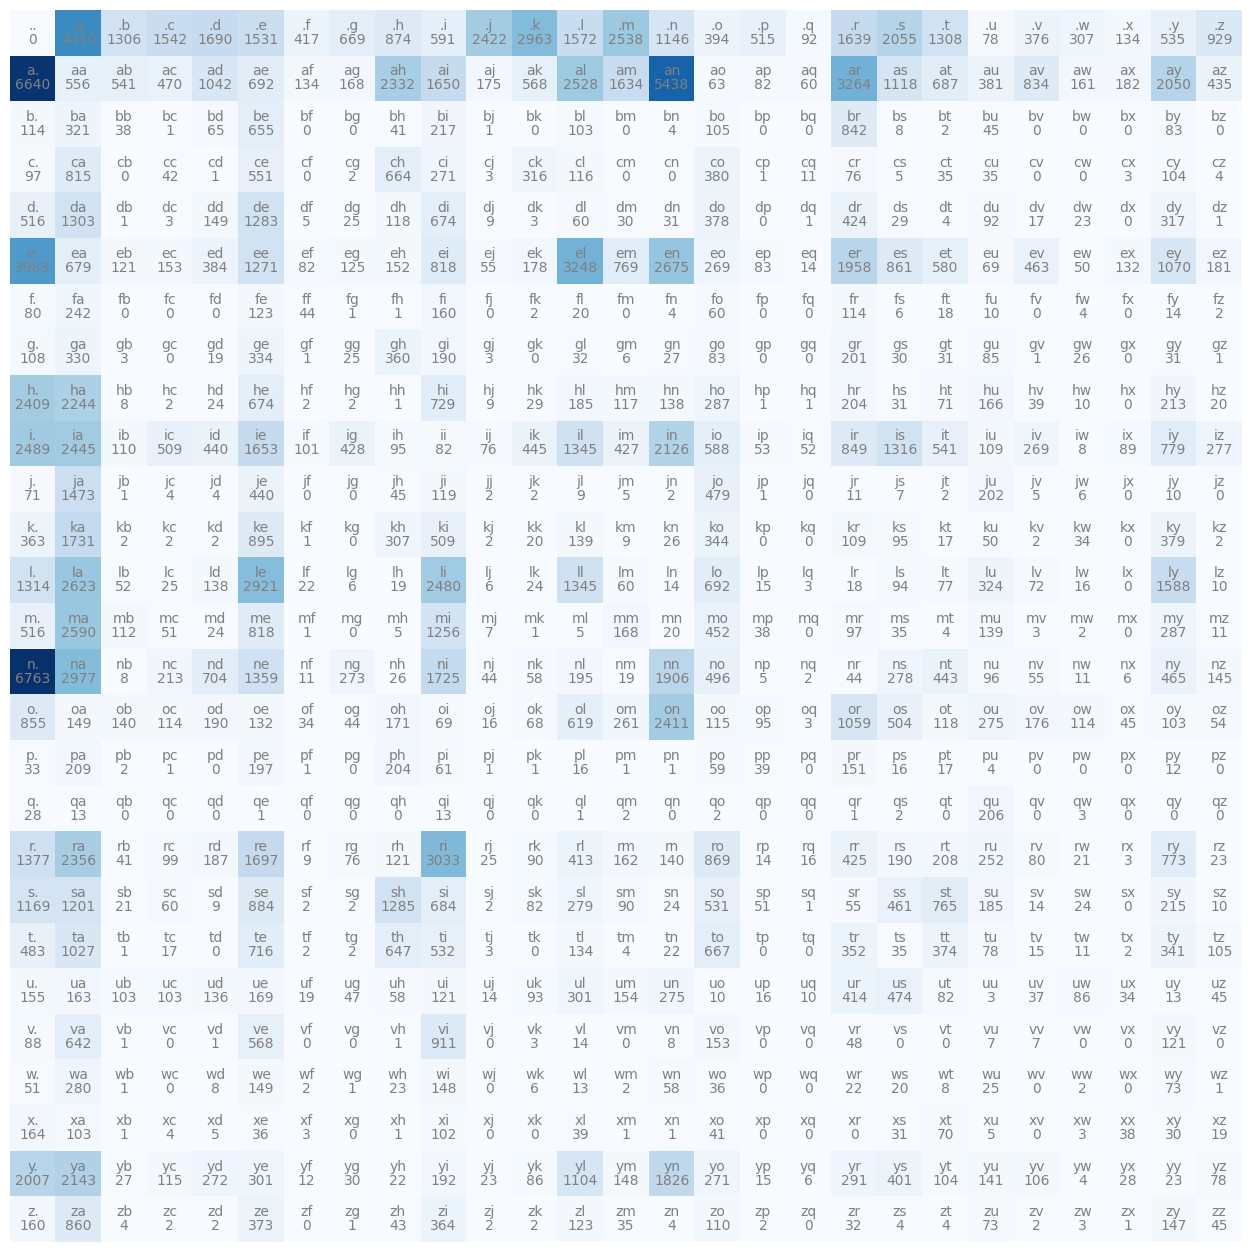

In [7]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
    plt.axis('off')

In [8]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [9]:
g = torch.Generator().manual_seed(0xFACEBEEF)

ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'e'

In [10]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

In [11]:
ix = 0
out = []

while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
        break

print(''.join(out))

mmila.


In [12]:
log_likelyhood = 0.0
n = 0

for w in words[:10]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f}, {logprob:.4f}')

nll = -log_likelyhood / n
print(nll)

tensor(2.3944)


### NN Bigram

In [13]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [14]:
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

torch.float32


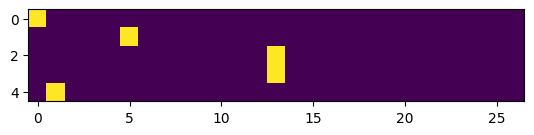

In [15]:
plt.imshow(xenc)
print(xenc.dtype)

In [16]:
W = torch.randn((27, 27))

logits = xenc @ W
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob

tensor([[0.0178, 0.0317, 0.0081, 0.0235, 0.0635, 0.1355, 0.0175, 0.0146, 0.0226,
         0.0193, 0.0879, 0.0108, 0.0328, 0.0132, 0.0487, 0.0316, 0.0228, 0.0103,
         0.0477, 0.0117, 0.0637, 0.0428, 0.0192, 0.0494, 0.0894, 0.0243, 0.0398],
        [0.1317, 0.0934, 0.0624, 0.0628, 0.0457, 0.0205, 0.0248, 0.0703, 0.0251,
         0.0075, 0.0188, 0.0530, 0.0072, 0.0083, 0.0505, 0.0183, 0.0060, 0.0322,
         0.0259, 0.0039, 0.0065, 0.0191, 0.0253, 0.0074, 0.0996, 0.0151, 0.0588],
        [0.0836, 0.0307, 0.0160, 0.0775, 0.0396, 0.0190, 0.0049, 0.0667, 0.0746,
         0.0334, 0.0284, 0.0578, 0.0156, 0.0294, 0.0513, 0.0221, 0.0121, 0.0761,
         0.0533, 0.0193, 0.0552, 0.0212, 0.0415, 0.0128, 0.0270, 0.0174, 0.0136],
        [0.0836, 0.0307, 0.0160, 0.0775, 0.0396, 0.0190, 0.0049, 0.0667, 0.0746,
         0.0334, 0.0284, 0.0578, 0.0156, 0.0294, 0.0513, 0.0221, 0.0121, 0.0761,
         0.0533, 0.0193, 0.0552, 0.0212, 0.0415, 0.0128, 0.0270, 0.0174, 0.0136],
        [0.1580, 0.0302,

summary

In [17]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [18]:
#initialize 27 neuron weights, which recieve 27 inputs
g = torch.Generator().manual_seed(0xFACEBEEF)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [19]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float()    #input to the network one hot encoding
logits = xenc @ W                               #predict log counts

#softmax
counts = logits.exp()                           #turn log counts into counts
probs = counts / counts.sum(1, keepdims=True)   #normalised probabilities
loss = -probs[torch.arange(5), ys].log().mean()

In [20]:
print(loss.item())

3.689953327178955


In [21]:
#backward pass
W.grad = None
loss.backward()

In [22]:
#optimize
W.data += -0.1 * W.grad

Optimised

In [23]:
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('num examples: ',num)

g = torch.Generator().manual_seed(0xFACEBEEF)
W = torch.randn((27, 27), generator=g, requires_grad=True)

num examples:  228146


In [24]:
for k in range(100):

    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()    #input to the network one hot encoding
    logits = xenc @ W                               #predict log counts

    #softmax
    counts = logits.exp()                           #turn log counts into counts
    probs = counts / counts.sum(1, keepdims=True)   #normalised probabilities
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    #print(loss.item())

    #backward pass
    W.grad = None
    loss.backward()

    #optimize
    W.data += -10 * W.grad

print(loss.item())

2.587277889251709


In [25]:
g = torch.Generator().manual_seed(0xFACEBEEF)

for i in range(10):

    out = []
    ix = 0
    while True:

        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()    
        logits = xenc @ W                               
        counts = logits.exp()                           
        probs = counts / counts.sum(1, keepdims=True)  

        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out)) 

ennmea.
ladipwi.
thaewpen.
jwqen.
jabdede.
i.
oen.
m.
tuh.
mikca.


### MLP

In [26]:
#create char/integer map
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [27]:
#build dataset

block_size = 3          #context length

X, Y = [], []

for w in words[:2]:

    print(w)
    context = [0] * block_size
    for ch in w +'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .


In [28]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([12, 3]), torch.int64, torch.Size([12]), torch.int64)

In [29]:
C = torch.randn((27, 2))
C

tensor([[-0.4788, -1.6236],
        [-0.8487, -0.4297],
        [ 0.9414,  0.3008],
        [-1.1989, -1.1644],
        [ 0.1408, -0.5068],
        [-1.0022,  0.6122],
        [-1.7821,  0.7383],
        [ 1.2024, -0.0212],
        [-0.8671, -0.5655],
        [-0.6677, -1.8042],
        [-0.3143,  1.4981],
        [ 0.1545,  1.0057],
        [-1.7544,  0.2238],
        [ 1.4968, -0.7922],
        [ 0.7045, -1.8293],
        [ 1.4258, -0.6649],
        [-0.0572,  1.4665],
        [-0.5810,  0.4645],
        [ 0.3651,  0.0380],
        [-0.7500,  0.4207],
        [ 1.0851, -0.6863],
        [ 0.8031,  0.2088],
        [-0.3124, -1.2192],
        [-0.3027,  0.1484],
        [ 1.7009,  0.2130],
        [ 2.0574, -0.5702],
        [ 1.1597,  0.7205]])

In [30]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.0022,  0.6122])

In [31]:
#index embedding for each integer in context
enb = C[X]
enb.shape

torch.Size([12, 3, 2])

In [32]:
#initialise weights
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [33]:
#option to squash tensor from (12, 3, 2) to (12, 6)
torch.cat([enb[:, 0, :], enb[:, 1, :], enb[:, 2, :]], 1).shape

torch.Size([12, 6])

In [34]:
#another option
torch.cat(torch.unbind(enb,1), 1).shape

torch.Size([12, 6])

In [35]:
#most efficient option
enb.view(-1, 6).shape

torch.Size([12, 6])

In [36]:
#using .view() to change tensor shape
a = torch.randn(20)
print(a.shape)
print(a.view(5, 4).shape)
print(a.view(2,2,5).shape)
print(a.view(-1, 2, 2).shape)       # -1 will infer shape

torch.Size([20])
torch.Size([5, 4])
torch.Size([2, 2, 5])
torch.Size([5, 2, 2])


In [37]:
h = torch.tanh(enb.view(-1, 6) @ W1 + b1)
h.shape, h

(torch.Size([12, 100]),
 tensor([[-0.9066,  0.5392,  0.6846,  ..., -0.8169,  0.8957, -0.9947],
         [ 0.9348,  0.7921, -0.5664,  ..., -0.5084,  0.9469,  0.7210],
         [ 0.4196,  0.5218, -0.1644,  ..., -0.6295,  0.9689, -0.9964],
         ...,
         [-0.9999,  0.9274, -0.9874,  ...,  0.9954, -0.9895, -0.8981],
         [-0.9778,  0.1752,  0.7816,  ...,  0.1826,  0.9429, -0.9990],
         [-0.0585,  0.7605, -0.1818,  ..., -0.6046,  0.6788, -0.7471]]))

In [38]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [39]:
logits = h @ W2 + b2
logits.shape

torch.Size([12, 27])

In [40]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape

torch.Size([12, 27])

In [41]:
loss = -prob[torch.arange(enb.shape[0]), Y].log().mean()
loss

tensor(15.1433)

refactored

In [42]:
#build dataset

block_size = 3          #context length

X, Y = [], []

for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w +'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [43]:
def build_dataset(words):
    blocksize = 8

    X, Y = [], []

    for w in words:

        #print(w)
        context = [0] * block_size
        for ch in w +'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

random.seed(0xFACEBEEF)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])




In [44]:
#parameters
g = torch.Generator().manual_seed(0xFACEBEEF)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g) * 0.01
b2 = torch.randn(27, generator=g) * 0

params = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in params))

11897


In [45]:
for p in params:
    p.requires_grad = True

lri = []
lossi = []

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [53]:
for i in range(10000):

    #create minibatches
    ix = torch.randint(0, Xtr.shape[0], (128,))

    #forward pass
    enb = C[Xtr[ix]]
    h = torch.tanh(enb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])     #F.cross_entropy is the same as taking the logits,
    #print(loss)                                #exponentiating, getting the mean, and calculating
                                                #loss, but much more efficient
    #backward pass
    for p in params:
        p.grad = None

    loss.backward()

    #update
    lr = 0.01# if i < 50000 else 0.01
    for p in params:
        p.data += -lr * p.grad

    #track stats
    lri.append(lr)
    lossi.append(loss.log10().item())

print("loss for minibatch: ", loss.item())

#loss for entire set
enb = C[Xtr]
h = torch.tanh(enb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print("loss for test set: ", loss.item())

#loss for dev set
enb = C[Xdev]
h = torch.tanh(enb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print("loss for dev set: ", loss.item())

loss for minibatch:  2.248485565185547
loss for test set:  2.316910743713379
loss for dev set:  2.336510181427002


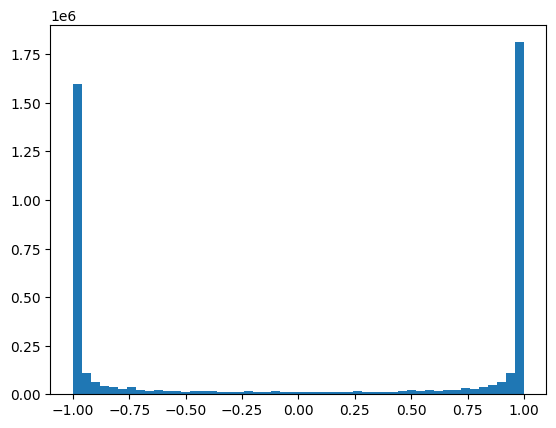

In [54]:
plt.hist(h.view(-1).tolist(), 50);

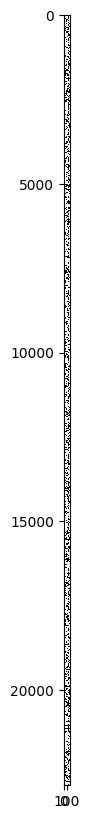

In [55]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

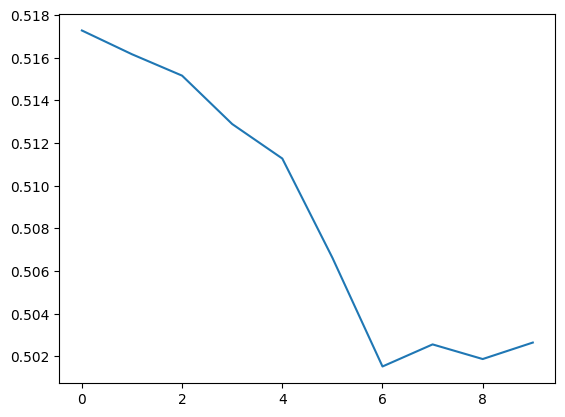

In [49]:
plt.plot([x for x, _ in enumerate(lossi)], lossi)

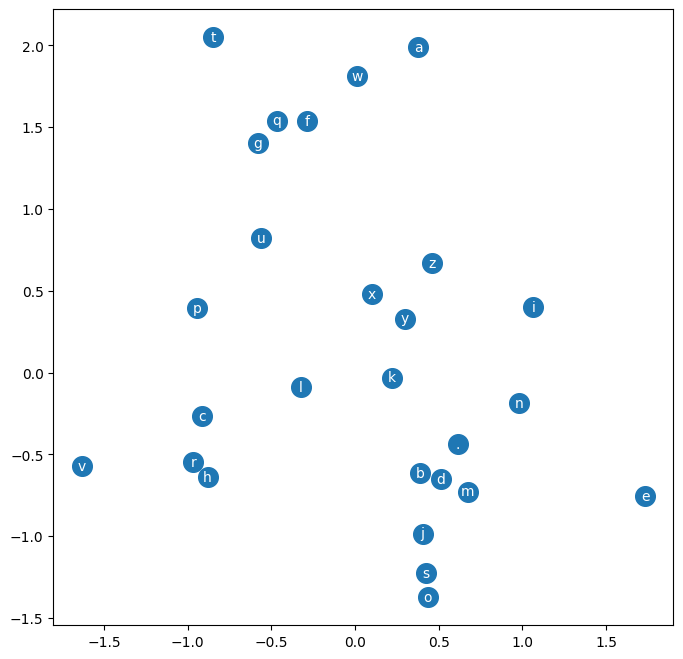

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')

In [51]:
g = torch.Generator().manual_seed(0xFACEBEEF + 2)

for i in range(20):

    out = []
    context = [0] * block_size
    while True:
        enb = C[torch.tensor([context])]
        h = torch.tanh(enb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

cwjjxxeufimxkwxuaphaahcgzrfxyujoupe.
sadbviehalpysfsvurwfxisqfmvafrnt.
egnhrhawnbtgnaabt.
wlehcysfbtcpobkja.
mrrnio.
aqtjjussuwadgezsnuasveutaepqsuhlftbzjxwfmlb.
roeokqxerayadfthqfutdkjvsxddlbizgompwekqlmlz.
okdbaswdstqydulccajmyvzwyottxqfmyastnxedbkqkrpcxlkdxzieuxspagllzfnkcqkjxbnkdwvurutvodq.
nrxxn.
ahvinqiiagmzvstpnbxrwyaxiyatefpfduchdttln.
rilap.
ebrlumfy.
xlk.
xzluacjehlvdsi.
ywxa.
wjyucjlipahhykjnbpyrrc.
gpbhyihargpagpvcrvvhqqipfwomaunolwwclrxcrqjllcyoghzhgqxoodjwiyrmkywg.
wacrcwxjsoqzkndlczzfpglmianoggppstglceyulzvebldbsa.
hlwlizvvkqkrtgwazxmuzw.
xxh.


### Batch Normalization

In [124]:
#parameters

block_size = 3

n_hidden = 200
n_enbd = 10
vocab_size = 27

g = torch.Generator().manual_seed(0xFACEBEEF)
C = torch.randn((vocab_size, n_enbd), generator=g)
W1 = torch.randn((block_size * n_enbd, n_hidden), generator=g) * (5/3) / ((n_enbd * block_size) ** 0.5)
b1 = torch.randn(n_hidden, generator=g) * 0 * 0.01
W2 = torch.randn((n_hidden,vocab_size), generator=g) * 0.01
b2 = torch.randn(vocab_size, generator=g) * 0.01

bn_gain = torch.ones([1, n_hidden])
bn_bias = torch.zeros([1, n_hidden])

params = [C, W1, b1, W2, b2, bn_bias, bn_gain]
print(sum(p.nelement() for p in params))

for p in params:
    p.requires_grad = True

lossi = []

12297


In [125]:
max_steps = 20000
batch_size = 32
lossi = []

print_freq = 1000

for i in range(max_steps):

    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix]

    enb = C[Xb]
    enbcat = enb.view(enb.shape[0], -1)
    hpreact = enbcat @ W1 + b1
    hpreact = bn_gain * (hpreact - hpreact.mean(0, keepdims=True)) / hpreact.std(0, keepdims=True) + bn_bias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)

    for p in params:
        p.grad = None
        
    loss.backward()

    lr = 0.1
    for p in params:
        p.data += -lr * p.grad

    if i % print_freq == 0:
        print(f'{i:7d}/{max_steps}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/20000: 3.3003
   1000/20000: 2.5045
   2000/20000: 2.3507
   3000/20000: 2.4667
   4000/20000: 2.3389
   5000/20000: 2.3480
   6000/20000: 2.3478
   7000/20000: 2.1191
   8000/20000: 2.8718
   9000/20000: 1.9701
  10000/20000: 2.1251
  11000/20000: 2.0991
  12000/20000: 2.3542
  13000/20000: 2.4657
  14000/20000: 2.1466
  15000/20000: 2.1742
  16000/20000: 1.9719
  17000/20000: 2.0054
  18000/20000: 1.7912
  19000/20000: 2.2605


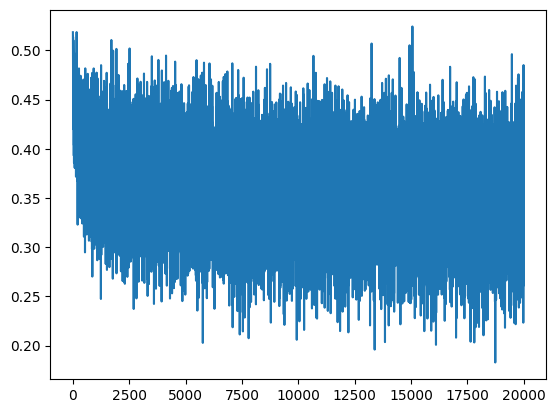

In [126]:
plt.plot(lossi)

In [136]:
with torch.no_grad():

    enb = C[Xtr]
    enbcat = enb.view(enb.shape[0], -1)
    hpreact = enbcat @ W1 + b1

    bn_mean = hpreact.mean(0, keepdim=True)
    bn_std = hpreact.std(0, keepdim=True)

@torch.no_grad()
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xte, Yte)
    }[split]

    enb = C[x]
    enbcat = enb.view(enb.shape[0], -1)
    hpreact = enbcat @ W1 + b1
    hpreact = bn_gain * (hpreact - bn_mean) / bn_std + bn_bias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y)
    print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.202446460723877
val 2.233471632003784


In [ ]:
#train 2.1870853900909424
#val 2.2256205081939697

In [128]:
g = torch.Generator().manual_seed(0xFACEBEEF + 2)

for i in range(20):

    out = []
    context = [0] * block_size
    while True:
        enb = C[torch.tensor([context])]
        h = torch.tanh(enb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

chennxellisxmwanaghamhagzlixyntelan.
salyviehalynsleygansxistemmagrntzevlhzhagnn.
gzavid.
wafrufatbandollyandrengoldstavissavadgez.
nuzsiellah.
asthfattlmylamardranch.
xelahadnah.
daxdajdandylbengamphrixlanzlyndillahstqydelynajmivawsonnshfanastag.
dakqarymdlyndzinaxspellezfon.
zalabnigha.
jumatdi.
namxh.
jhakligianmigstandeliganiyathfandellyttlynnilandelleumlynalidazlu.
jukhazdin.
arxanjjaccandelihgantmichrishabaydhargxandachstmolisanomannellaclyxssyjelizag.
zhaviothjaivem.
ang.
kharchnjsaq.
kzalezzabglmighonganstylieassevenleysandawlizavuskrtshawziuz.
kxmalley.


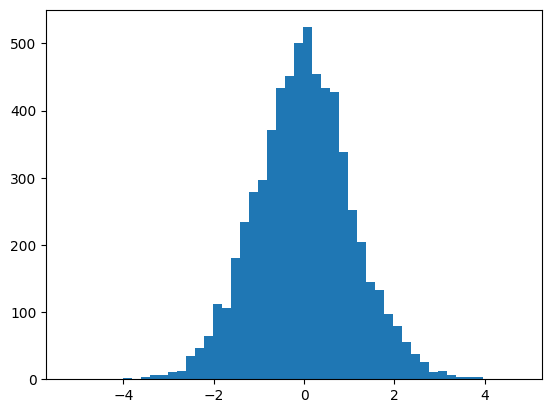

In [129]:
plt.hist(hpreact.view(-1).tolist(), 50);

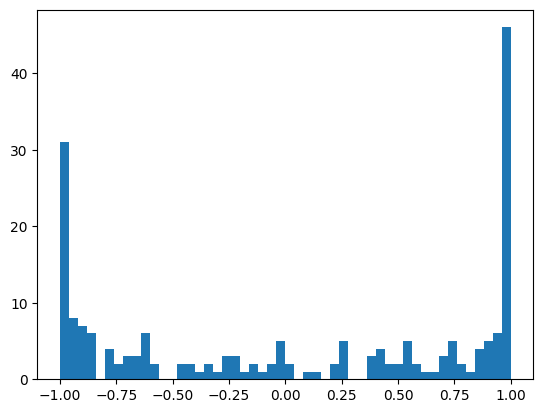

In [130]:
plt.hist(h.view(-1).tolist(), 50);

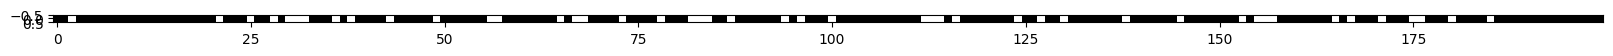

In [132]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

### Larger MLP

In [180]:
class Linear:

    def __init__(self, fan_in, fan_out, bias=True):

        self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
        self.bias = torch.zeros(fan_out) if bias else None


    def __call__(self, x):

        self.out = x @ self.weight
        if self.bias is not None: 
            self.out += self.bias
        return self.out
    
    def parameters(self):

        return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:

    def __init__(self, dim, eps=1e-5, momentum=0.1):

        self.eps = eps
        self.momentum = momentum
        self.training = True
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)


    def __call__(self, x):

        if self.training:
            xmean = x.mean(0, keepdims=True)
            xvar = x.var(0, keepdims=True, unbiased=True)
        else:
            xmean = self.running_mean
            xvar = self.running_var

        xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
        self.out = self.gamma * xhat + self.beta

        if self.training:
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
        
        return self.out

    
    def parameters(self):
        return [self.gamma, self.beta]


class Tanh:

    def __call__(self, x):

        self.out = torch.tanh(x)
        return self.out

    def parameters(self):
        return []


n_enbd = 10
n_hidden = 100
vocab_size = 27
block_size = 3

g = torch.Generator().manual_seed(0xFACEBEEF)

C = torch.randn((vocab_size, n_enbd), generator=g)

layers = [
    Linear(n_enbd * block_size, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size), BatchNorm1d(vocab_size),
]

with torch.no_grad():
    layers[-1].gamma += 0.1
    for layer in layers[:-1]:
        if isinstance(layer, Linear):
            layer.weight *= 5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

47551


In [182]:
max_steps = 20000
batch_size = 32
lossi = []
ud = []

print_freq = max_steps / 20

for i in range(max_steps):

    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix]

    enb = C[Xb]
    x = enb.view(enb.shape[0], -1)
    for layer in layers:
        x = layer(x)
    loss = F.cross_entropy(x, Yb)

    for layer in layers:
        layer.out.retain_grad()
    for p in parameters:
        p.grad = None
        
    loss.backward()

    lr = 0.1 if i < (max_steps / 2) else 0.1
    for p in parameters:
        p.data += -lr * p.grad

    if i % print_freq == 0:
        print(f'{i:7d}/{max_steps}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    with torch.no_grad():
        ud.append([(lr*p.grad.std() / p.data.std()).log10().item() for p in parameters])

      0/20000: 2.3691
   1000/20000: 2.5411
   2000/20000: 1.9466
   3000/20000: 2.0504
   4000/20000: 1.9416
   5000/20000: 2.7248
   6000/20000: 2.1443
   7000/20000: 2.1186
   8000/20000: 2.6970
   9000/20000: 2.2641
  10000/20000: 2.4367
  11000/20000: 2.2346
  12000/20000: 2.6506
  13000/20000: 1.8068
  14000/20000: 1.6566
  15000/20000: 2.2801
  16000/20000: 2.3387
  17000/20000: 2.3719
  18000/20000: 1.9920
  19000/20000: 2.0092


Layer 2 (Tanh) - mean: +0.01, std: 0.65, saturated = 6.44%
Layer 5 (Tanh) - mean: +0.01, std: 0.68, saturated = 8.12%
Layer 8 (Tanh) - mean: +0.00, std: 0.69, saturated = 6.88%
Layer 11 (Tanh) - mean: -0.02, std: 0.70, saturated = 6.34%
Layer 14 (Tanh) - mean: +0.00, std: 0.70, saturated = 5.59%


Text(0.5, 1.0, 'activation distribution')

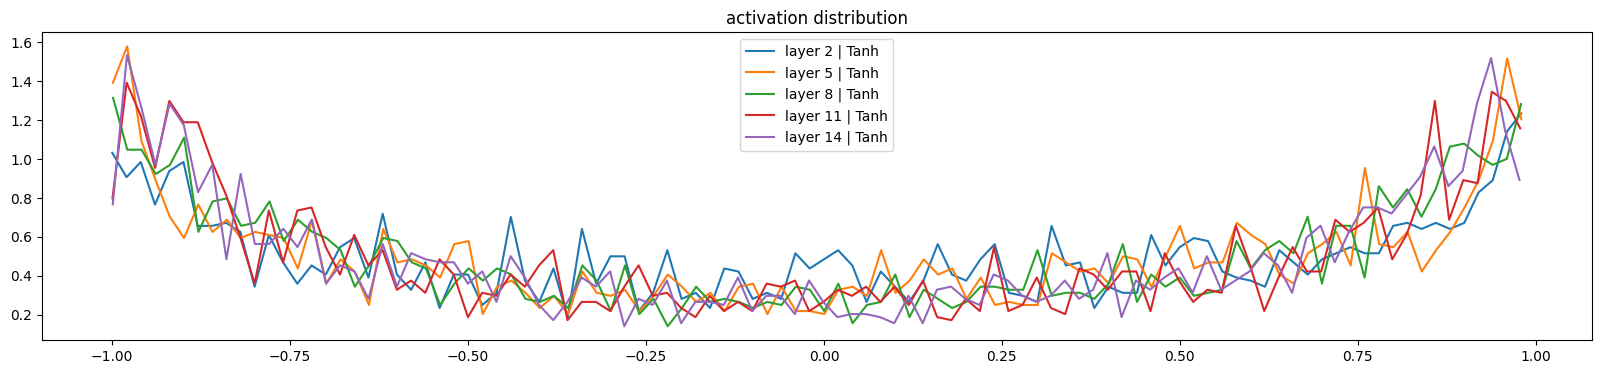

In [183]:
plt.figure(figsize=(20, 4))
legends = []
for i, layer in enumerate(layers[:-1]):
    if isinstance(layer, Tanh):
        t = layer.out
        print('Layer %d (%s) - mean: %+.2f, std: %.2f, saturated = %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} | {layer.__class__.__name__}')
plt.legend(legends)
plt.title('activation distribution')

Layer 2 (Tanh) - mean: +0.000000, std: 3.527662e-03
Layer 5 (Tanh) - mean: +0.000000, std: 3.416484e-03
Layer 8 (Tanh) - mean: +0.000000, std: 3.491956e-03
Layer 11 (Tanh) - mean: -0.000000, std: 3.486569e-03
Layer 14 (Tanh) - mean: -0.000000, std: 3.426881e-03


Text(0.5, 1.0, 'activation distribution')

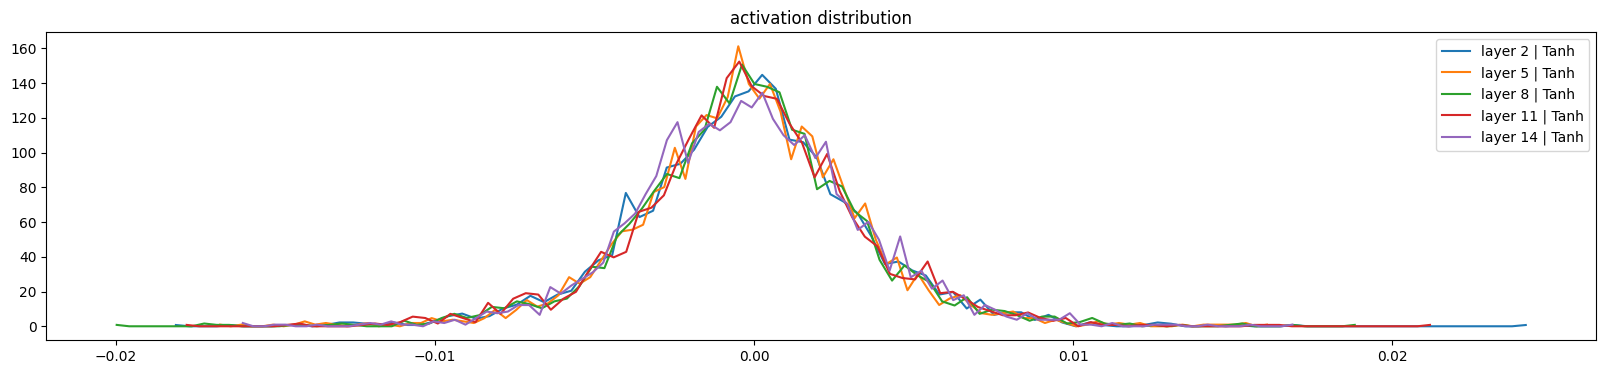

In [184]:
plt.figure(figsize=(20, 4))
legends = []
for i, layer in enumerate(layers[:-1]):
    if isinstance(layer, Tanh):
        t = layer.out.grad
        print('Layer %d (%s) - mean: %+f, std: %e' % (i, layer.__class__.__name__, t.mean(), t.std(), ))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} | {layer.__class__.__name__}')
plt.legend(legends)
plt.title('activation distribution')

layer: 0 | weight: (27, 10) | mean: -0.000000 | std: 0.0128 | grad:data ratio: 1.277107e-02
layer: 1 | weight: (30, 100) | mean: -0.000265 | std: 0.0084 | grad:data ratio: 2.503695e-02
layer: 5 | weight: (100, 100) | mean: -0.000061 | std: 0.0060 | grad:data ratio: 3.076709e-02
layer: 9 | weight: (100, 100) | mean: -0.000131 | std: 0.0060 | grad:data ratio: 3.120972e-02
layer: 13 | weight: (100, 100) | mean: +0.000026 | std: 0.0059 | grad:data ratio: 3.128761e-02
layer: 17 | weight: (100, 100) | mean: +0.000031 | std: 0.0055 | grad:data ratio: 2.972559e-02
layer: 21 | weight: (100, 27) | mean: -0.000045 | std: 0.0105 | grad:data ratio: 4.564116e-02


Text(0.5, 1.0, 'weights gradient distribution')

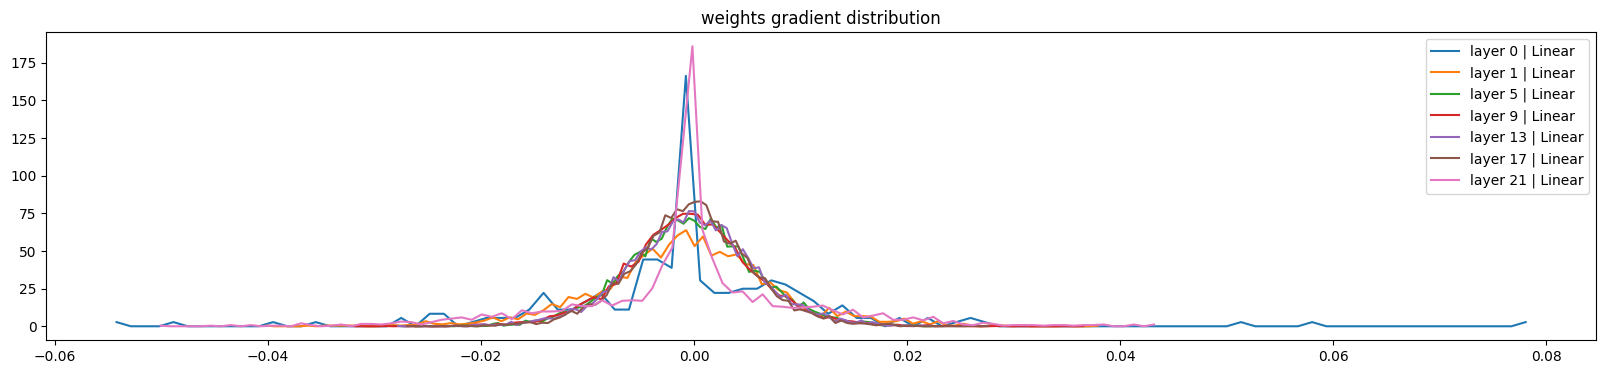

In [185]:
plt.figure(figsize=(20, 4))
legends = []
for i, p in enumerate(parameters):
    t = p.grad
    if p.ndim ==2:
        print('layer: %d | weight: %8s | mean: %+f | std: %.4f | grad:data ratio: %e' % (i, tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
        hy, hx = torch.histogram(t, density=True)
        plt.plot(hx[:-1].detach(), hy.detach())
        legends.append(f'layer {i} | {layer.__class__.__name__}')
plt.legend(legends)
plt.title('weights gradient distribution')

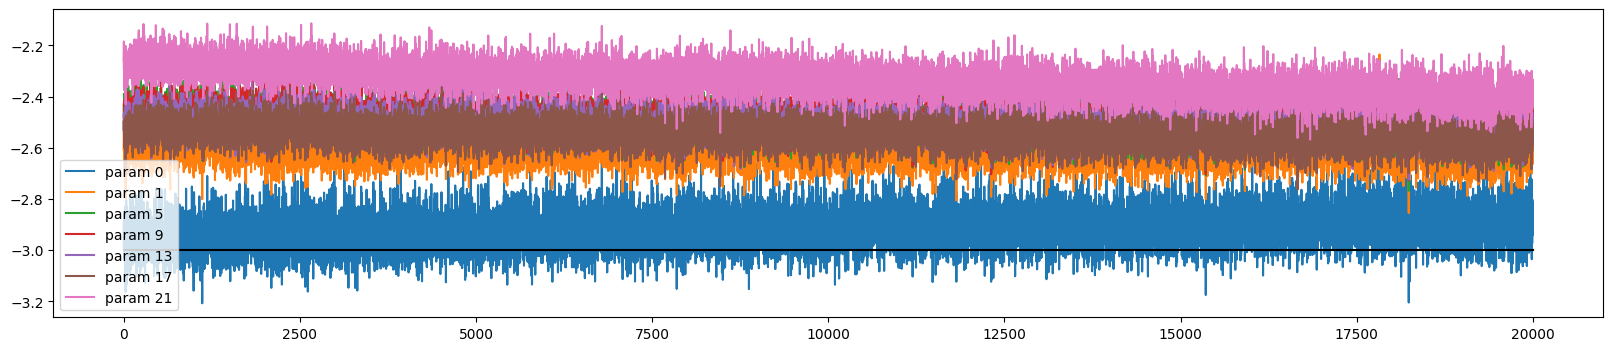

In [186]:
plt.figure(figsize=(20, 4))
legends = []
for i, p in enumerate(parameters):
    if p.ndim == 2:
        plt.plot([ud[j][i] for j in range(len(ud))])
        legends.append(f'param {i}')
plt.plot([0, len(ud)], [-3, -3], 'k')
plt.legend(legends);

In [187]:
@torch.no_grad()
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] 
  x = emb.view(emb.shape[0], -1)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, y)
  print(split, loss.item())

# put layers into eval mode
for layer in layers:
  layer.training = False
split_loss('train')
split_loss('val')

train 2.135019540786743
val 2.178889513015747


In [ ]:
for layer in layers:
  layer.training = True

In [188]:
g = torch.Generator().manual_seed(0xFACEBEEF + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size 
    while True:
      emb = C[torch.tensor([context])] 
      x = emb.view(emb.shape[0], -1) 
      for layer in layers:
        x = layer(x)
      logits = x
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

joylee.
gorrakesgaiton.
evani.
adeel.
marqueghachana.
jerereer.
haandi.
dalaidyn.
bonson.
fuon.
shullyd.
fari.
lumirkepramal.
adamena.
vet.
kiah.
raw.
monie.
bayla.
brid.
